In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('youtube_data.csv',encoding='latin-1')

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# Q1. What are the top 10 YouTube channels based on the number of subscribers?

# Extract top 10 youtube channels based on number of subscribers

In [5]:
top_10_channels=df[['rank','Youtuber','subscribers']].sort_values(by='subscribers',ascending=False).head(10)
top_10_channels.reset_index(drop=True, inplace=True)
print(top_10_channels)

   rank                    Youtuber  subscribers
0     1                    T-Series  245000000.0
1     2              YouTube Movies  170000000.0
2     3                     MrBeast  166000000.0
3     4  Cocomelon - Nursery Rhymes  162000000.0
4     5                   SET India  159000000.0
5     6                       Music  119000000.0
6     7         ýýý Kids Diana Show  112000000.0
7     8                   PewDiePie  111000000.0
8     9                 Like Nastya  106000000.0
9    10               Vlad and Niki   98900000.0


# Q2. Which category has the highest average number of subscribers?

In [6]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,3
video views,0
category,55
Title,0
uploads,0
Country of origin,125
Country,125
Abbreviation,125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [8]:
df['category']=df['category'].fillna(df['category'].mode()[0])

In [9]:
df['subscribers']=df['subscribers'].fillna(df['subscribers'].mean())

category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Sports                   3.285000e+07
Nonprofits & Activism    2.775000e+07
Film & Animation         2.752878e+07
Education                2.712391e+07
Music                    2.604926e+07
Movies                   2.565000e+07
Entertainment            2.248462e+07
Gaming                   2.088626e+07
News & Politics          2.063077e+07
People & Blogs           2.053130e+07
Comedy                   2.002571e+07
Howto & Style            1.935750e+07
Science & Technology     1.861765e+07
Pets & Animals           1.732000e+07
Autos & Vehicles         1.660000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


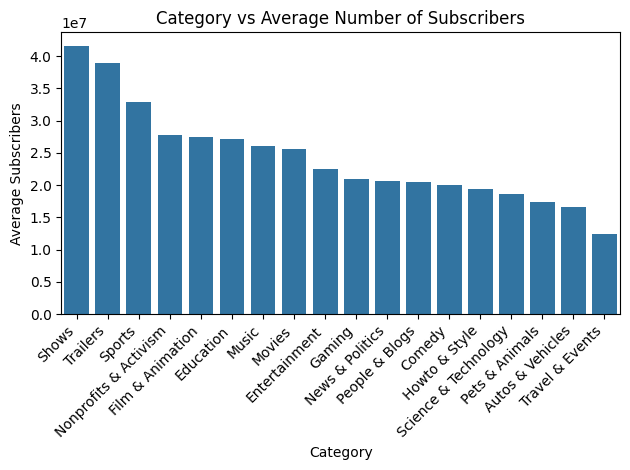

In [10]:
avg_cat_by_sub=df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print(avg_cat_by_sub)
# Assuming 'category' as index and 'subscribers' as values
sns.barplot(x=avg_cat_by_sub.index, y=avg_cat_by_sub.values)
plt.title('Category vs Average Number of Subscribers')
plt.xlabel('Category')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

# Q3.	How many videos, on average, are uploaded by YouTube channels in each category?

In [11]:
avg_videos_by_cat=df.groupby('category')['uploads'].mean().sort_values(ascending=False)
print(avg_videos_by_cat)


category
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
Shows                     27443.692308
Sports                    19129.833333
Entertainment              9938.399317
People & Blogs             9256.793893
Trailers                   6839.000000
Gaming                     4285.273684
Pets & Animals             3562.800000
Movies                     3553.000000
Education                  3087.086957
Film & Animation           2861.844444
Music                      2325.945813
Science & Technology       2114.058824
Howto & Style              1695.500000
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Travel & Events             766.000000
Name: uploads, dtype: float64


# Q4.	What are the top 5 countries with the highest number of YouTube channels?

In [12]:
df['Country']=df['Country'].fillna(df['Country'].mode()[0])

In [13]:
top_5_countries=df.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(5)
print(top_5_countries)

Country
United States     440
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: Youtuber, dtype: int64


# Q5.	What is the distribution of channel types (individual vs. brand) across different categories?

In [14]:
df['channel_type']=df['channel_type'].fillna(df['channel_type'].mode()[0])

channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      2       0          0              1     0   
Comedy                       0      0      39          0             22     1   
Education                    0      0       0         36              3     2   
Entertainment                0      1       5          6            196     8   
Film & Animation             0      0       1          2             17    17   
Gaming                       0      1       1          0             20     2   
Howto & Style                0      0       0          0             10     0   
Movies                       0      0       0          0              0     2   
Music                        0      0       0          1             16     5   
News & Politics              0      0       0          0              3     0   
Nonprofits & Activism       

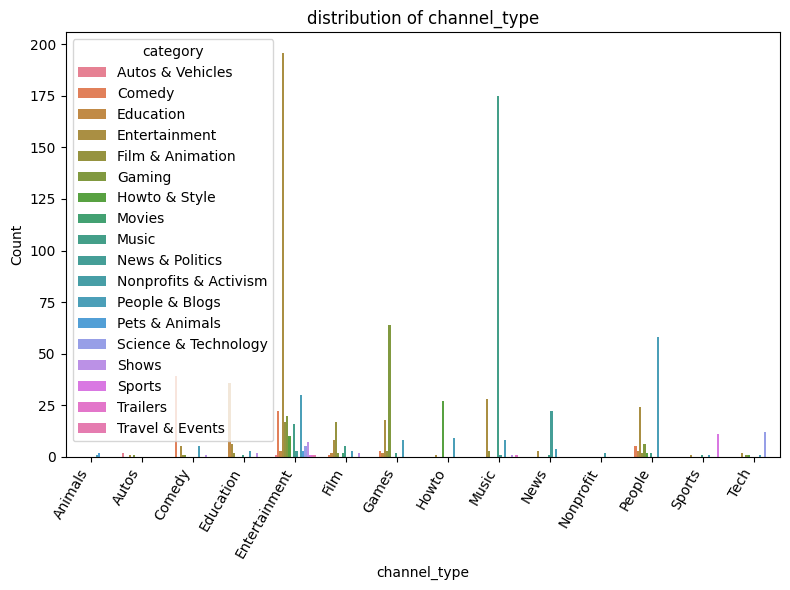

In [15]:
channel_type_distribution=pd.crosstab(df['category'],df['channel_type'])
print(channel_type_distribution)
plt.figure(figsize=(8,6))

# Unstack the crosstab to create a DataFrame with 'channel_type' as a column
channel_type_distribution = channel_type_distribution.unstack().reset_index(name='count')

# Now 'channel_type' is a column and 'count' holds the values
sns.barplot(x='channel_type', y='count', hue='category', data=channel_type_distribution)

plt.title('distribution of channel_type')
plt.xlabel('channel_type')
plt.ylabel('Count')
plt.xticks(rotation=60,ha='right')
plt.tight_layout()
plt.show()

     channel_type  count
0         Animals      3
1           Autos      4
2          Comedy     52
3       Education     50
4   Entertainment    336
5            Film     42
6           Games    100
7           Howto     37
8           Music    217
9            News     30
10      Nonprofit      2
11         People    102
12         Sports     14
13           Tech     17


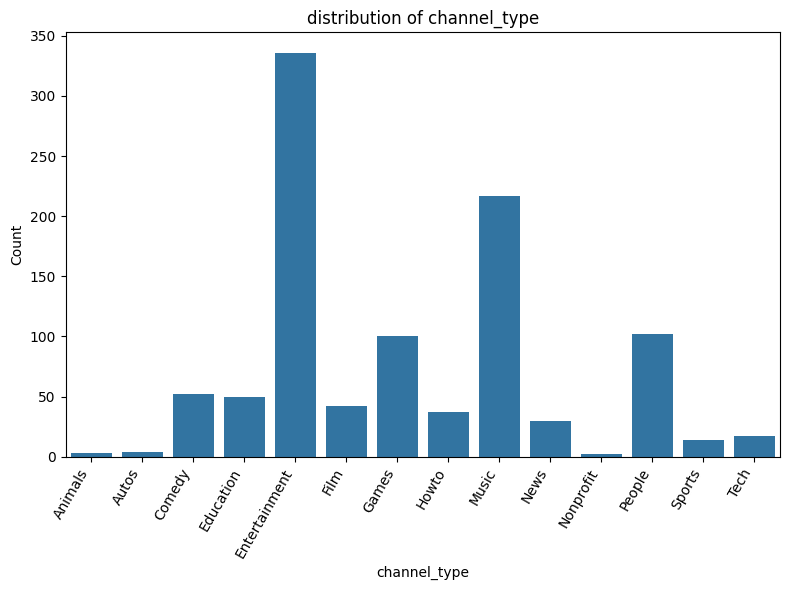

In [16]:
# Another approch for distribution of channel_type
distribution=df.groupby('channel_type')['category'].count().reset_index(name='count')
print(distribution)
plt.figure(figsize=(8,6))
sns.barplot(x='channel_type',y='count',data=distribution)
plt.title('distribution of channel_type')
plt.xlabel('channel_type')
plt.ylabel('Count')
plt.xticks(rotation=60,ha='right')
plt.tight_layout()
plt.show()

# Q6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

             subscribers  video views
subscribers     1.000000     0.748032
video views     0.748032     1.000000


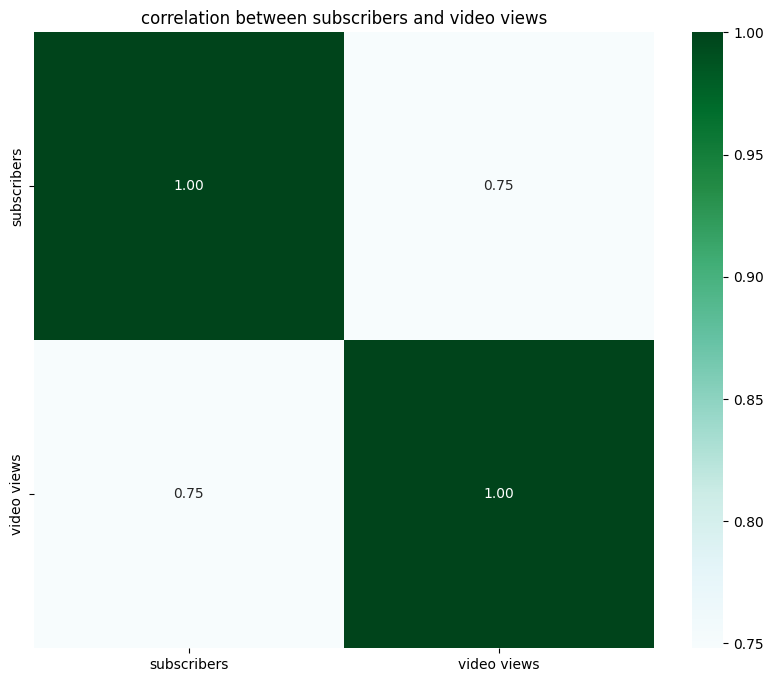

In [17]:
# creating variable
numeric_data=df[['subscribers','video views']].select_dtypes(include=['float64'])
# Creating correlation matrix of subscribers and video views
corr_matrix=numeric_data.corr()
print(corr_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='BuGn',fmt='.2f')
plt.title('correlation between subscribers and video views')
plt.show()

# Q7.	How do the monthly earnings vary between individual and brand YouTube channels?

               lowest_monthly_earnings  highest_monthly_earnings
channel_type                                                    
Animals                  176566.666667              2.833333e+06
Autos                     44150.157500              7.000026e+05
Comedy                    45869.729038              7.315022e+05
Education                 50188.000000              8.051820e+05
Entertainment             39784.923720              6.358646e+05
Film                      29086.429524              4.646072e+05
Games                     21677.960300              3.480582e+05
Howto                     14665.648649              2.339649e+05
Music                     35866.994977              5.726846e+05
News                      43756.875000              7.016400e+05
Nonprofit                 24400.000000              3.904000e+05
People                    41823.474902              6.691181e+05
Sports                    50778.571429              8.197357e+05
Tech                     

<Figure size 800x600 with 0 Axes>

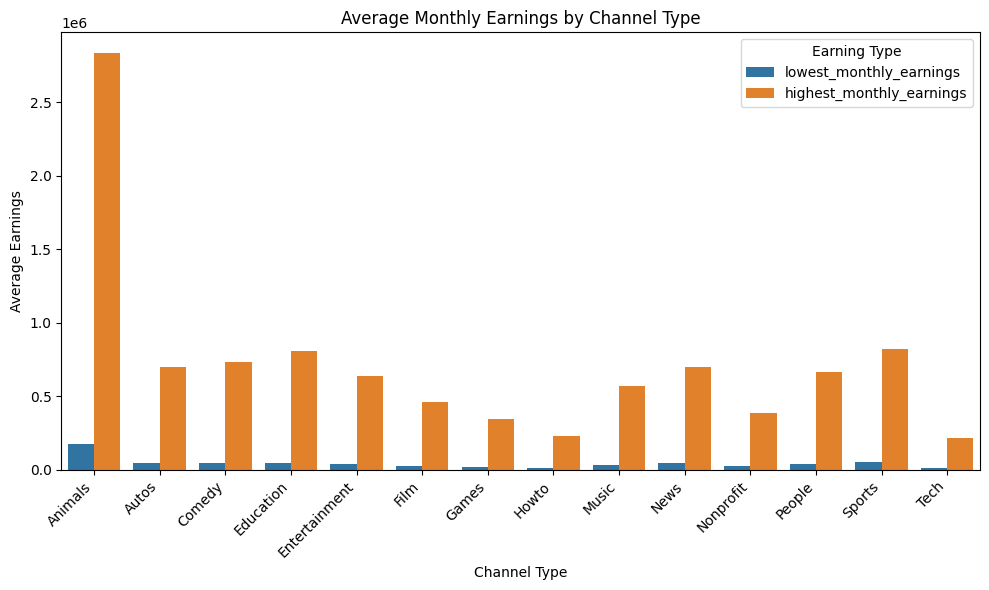

In [18]:
monthly_earnings_variation=df.groupby('channel_type')[['lowest_monthly_earnings','highest_monthly_earnings']].mean()
print(monthly_earnings_variation)
plt.figure(figsize=(8,6))
# Reshape the DataFrame
monthly_earnings_variation_melted = monthly_earnings_variation.reset_index().melt(id_vars='channel_type', var_name='Earning Type', value_name='Average Earnings')
plt.figure(figsize=(10, 6))
sns.barplot(x='channel_type', y='Average Earnings', hue='Earning Type', data=monthly_earnings_variation_melted)
plt.title('Average Monthly Earnings by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Average Earnings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

In [19]:
df['subscribers_for_last_30_days']=df['subscribers_for_last_30_days'].fillna(df['subscribers_for_last_30_days'].mean())

count    6.660000e+02
mean     3.495419e+05
std      6.131554e+05
min      1.000000e+00
25%      1.000000e+05
50%      2.000000e+05
75%      4.000000e+05
max      8.000000e+06
Name: subscribers_for_last_30_days, dtype: float64


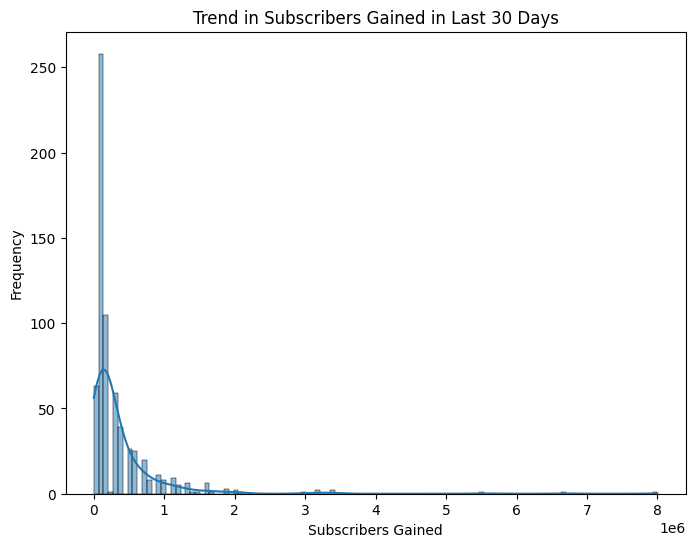

In [80]:
subscribers_gained_stats = df['subscribers_for_last_30_days'].describe()
print(subscribers_gained_stats)
plt.figure(figsize=(8, 6))
sns.histplot(df['subscribers_for_last_30_days'],kde=True)
plt.title('Trend in Subscribers Gained in Last 30 Days')
plt.xlabel('Subscribers Gained')
plt.ylabel('Frequency')
plt.show()

# Q9.	Are there any outliers in terms of yearly earnings from YouTube channels?

In [21]:
# Extract columns for yearly earnings
yearly_earnings = df[['lowest_yearly_earnings', 'highest_yearly_earnings']]
# Drop rows with missing data in the earnings columns
yearly_earnings = yearly_earnings.dropna()

# Calculate basic statistics to identify outliers (e.g., using the IQR method)
Q1 = yearly_earnings.quantile(0.25)
Q3 = yearly_earnings.quantile(0.75)
IQR = Q3 - Q1
# Define outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
outliers = yearly_earnings[
    (yearly_earnings < (Q1 - 1.5 * IQR)) | (yearly_earnings > (Q3 + 1.5 * IQR))
].dropna()
print("Outliers in Yearly Earnings:")
print(outliers)

Outliers in Yearly Earnings:
     lowest_yearly_earnings  highest_yearly_earnings
0                 6800000.0              108400000.0
2                 4000000.0               64700000.0
3                 5900000.0               94800000.0
4                 5500000.0               87500000.0
6                 2200000.0               35100000.0
..                      ...                      ...
908               1100000.0               17700000.0
970               2700000.0               43400000.0
990               1700000.0               26500000.0
995               2100000.0               34300000.0
999               2400000.0               39200000.0

[101 rows x 2 columns]


# 10.	What is the distribution of channel creation dates? Is there any trend over time?

col_0         count
created_date       
1.0              36
2.0              39
3.0              24
4.0              33
5.0              27
6.0              39
7.0              25
8.0              37
9.0              45
10.0             23
11.0             26
12.0             36
13.0             30
14.0             37
15.0             38
16.0             32
17.0             26
18.0             29
19.0             43
20.0             35
21.0             36
22.0             39
23.0             24
24.0             37
25.0             29
26.0             39
27.0             34
28.0             21
29.0             32
30.0             31
31.0             19


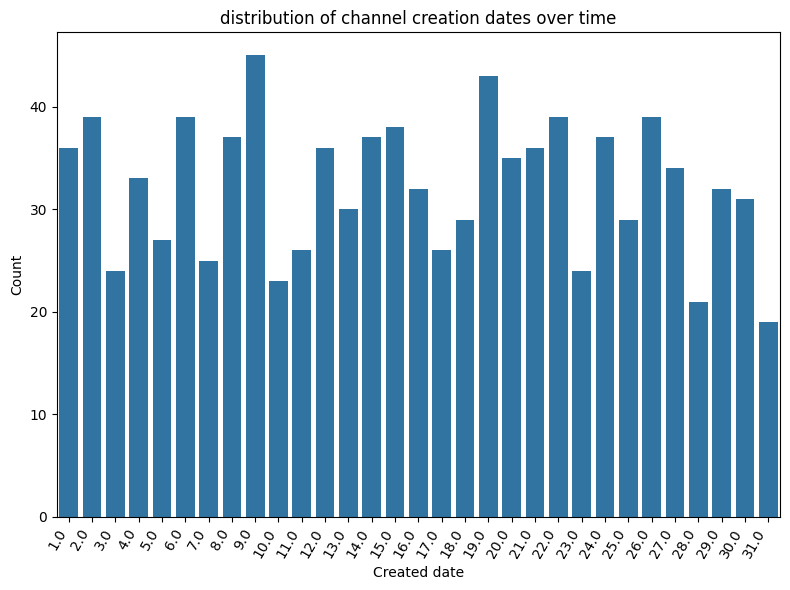

In [26]:
distribution_of_creation_dates=pd.crosstab(df['created_date'],columns='count')
print(distribution_of_creation_dates)
plt.figure(figsize=(8,6))
sns.barplot(x='created_date',y='count',data=distribution_of_creation_dates)
plt.title('distribution of channel creation dates over time')
plt.xlabel('Created date')
plt.ylabel('Count')
plt.xticks(rotation=60,ha='right')
plt.tight_layout()
plt.show()

# Another approch

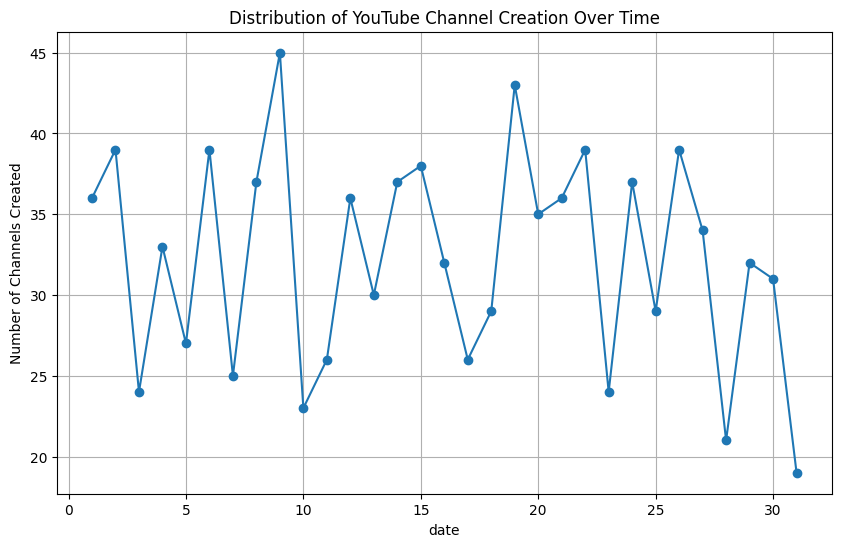

In [ ]:
# Extract and drop the missing values from columns
creation_dates = df['created_date'].dropna()

# Group by created date
creation_by_date = df.groupby('created_date').size()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(creation_by_date.index, creation_by_date.values, marker='o')
plt.title('Distribution of YouTube Channel Creation Over Time')
plt.xlabel('date')
plt.ylabel('Number of Channels Created')
plt.grid(True)
plt.show()


# Q11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

                 Country  Youtuber
0            Afghanistan         1
1                Andorra         1
2              Argentina        13
3              Australia         9
4             Bangladesh         1
5               Barbados         1
6                 Brazil        62
7                 Canada        15
8                  Chile         3
9                  China         1
10              Colombia        11
11                  Cuba         1
12               Ecuador         2
13                 Egypt         2
14           El Salvador         1
15               Finland         1
16                France         5
17               Germany         6
18                 India       169
19             Indonesia        28
20                  Iraq         2
21                 Italy         2
22                 Japan         5
23                Jordan         3
24                Kuwait         1
25                Latvia         1
26              Malaysia         1
27                Me

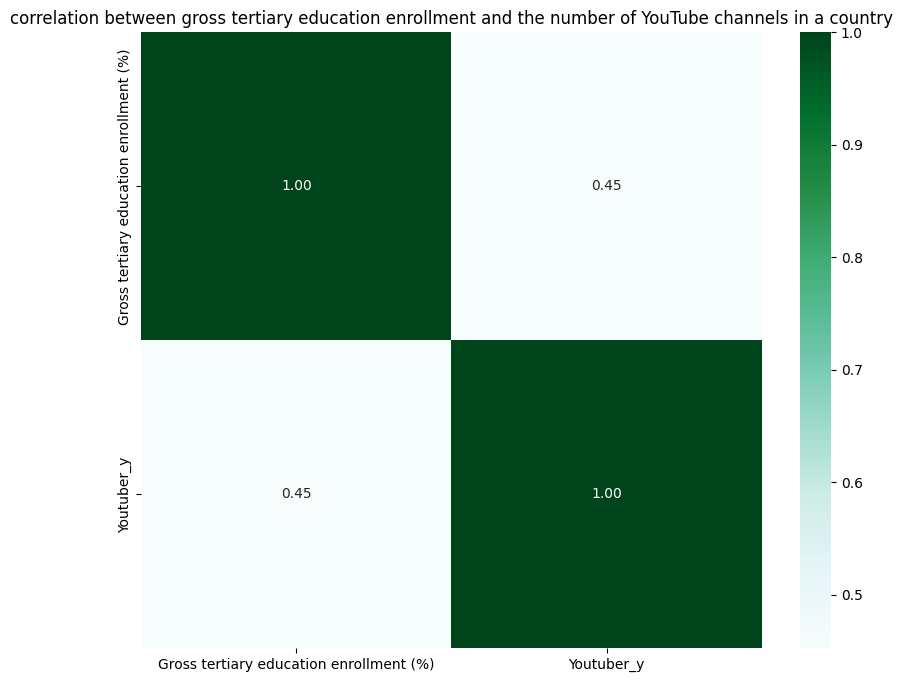

In [72]:
channels_per_country = df.groupby('Country')['Youtuber'].count().reset_index()
print(channels_per_country)
# Merge the 'Youtuber' count back into the original dataframe
df_Merged = df.merge(channels_per_country, on='Country', how='left')
# Use the correct DataFrame name 'channels_per_country' and select the 'Youtuber' column
numeric_data=df_Merged[['Gross tertiary education enrollment (%)','Youtuber_y']].select_dtypes(include=['int64','float64'])
# Creating correlation matrix of subscribers and video views
corr_matrix=numeric_data.corr()
print(corr_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='BuGn',fmt='.2f')
plt.title('correlation between gross tertiary education enrollment and the number of YouTube channels in a country')
plt.show()

# Q12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

          Country  Youtuber
0   United States       313
1           India       167
2          Brazil        62
3  United Kingdom        43
4          Mexico        33
5       Indonesia        28
6           Spain        22
7        Thailand        18
8     South Korea        17
9          Russia        16


<ipython-input-73-59481ff7d201>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unemployment rate',y='Youtuber_y',data=df_merged,palette='viridis')


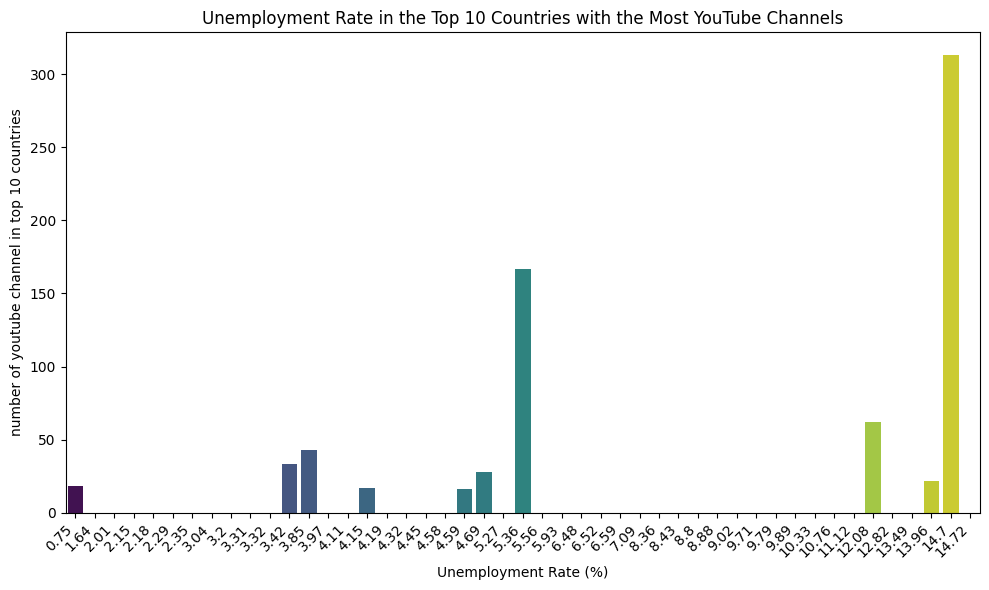

In [73]:

# Group the data by country and count the number of unique Youtubers (channels)
channels_per_top_10_country = df.groupby('Country')['Youtuber'].nunique().sort_values(ascending=False).reset_index().head(10)
print(channels_per_top_10_country)
# Merge the 'Youtuber' count back into the original dataframe
df_merged = df.merge(channels_per_top_10_country, on='Country', how='left')
# Plot the unemployment rates for the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Unemployment rate',y='Youtuber_y',data=df_merged,palette='viridis')
plt.title('Unemployment Rate in the Top 10 Countries with the Most YouTube Channels')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('number of youtube channel in top 10 countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Q13.	What is the average urban population percentage in countries with YouTube channels?

In [75]:
df['Urban_population']=df['Urban_population'].fillna(df['Urban_population'].mean())
df['Population']=df['Population'].fillna(df['Population'].mean())
# Calculate urban population percentage
df['Urban Population Percentage'] = (df['Urban_population'] / df['Population']) * 100

# Group by country and calculate the mean urban population percentage for each country
urban_population_by_country = df.groupby(['Country','Youtuber'])['Urban Population Percentage'].mean()
print(urban_population_by_country)
# Calculate the overall average urban population percentage
average_urban_population = urban_population_by_country.mean()

print(f"The average urban population percentage in countries with YouTube channels is {average_urban_population:.2f}%")


Country      Youtuber       
Afghanistan  Linkin Park        25.753999
Andorra      Musas              52.031649
Argentina    Alejo Igoa         91.991001
             Bizarrap           91.991001
             DrossRotzank       91.991001
                                  ...    
Venezuela    YOLO AVENTURAS     88.240002
Vietnam      FAPTV              36.628000
             Like Nastya VNM    36.628000
             POPS Kids          36.628000
india        T-Series           34.472000
Name: Urban Population Percentage, Length: 873, dtype: float64
The average urban population percentage in countries with YouTube channels is 70.52%


# Q14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

     Latitude   Longitude  Youtuber
0   37.090240  -95.712891       315
1   20.593684   78.962880       170
2  -14.235004  -51.925280        62
3   55.378051   -3.435973        44
4   23.634501 -102.552784        33
5   -0.789275  113.921327        28
6   40.463667   -3.749220        22
7   15.870032  100.992541        18
8   35.907757  127.766922        17
9   61.524010  105.318756        16
10  56.130366 -106.346771        15
11 -38.416097  -63.616672        13
12  12.879721  121.774017        12
13   4.570868  -74.297333        11
14  23.885942   45.079162        10
15 -25.274398  133.775136         9
16  23.424076   53.847818         8
17  48.379433   31.165580         8
18  51.165691   10.451526         6
19  30.375321   69.345116         6
20  36.204824  138.252924         5
21  46.227638    2.213749         5
22  60.128161   18.643501         4
23  38.963745   35.243322         4
24   1.352083  103.819836         4
25 -35.675147  -71.542969         3
26  30.585164   36.238414   

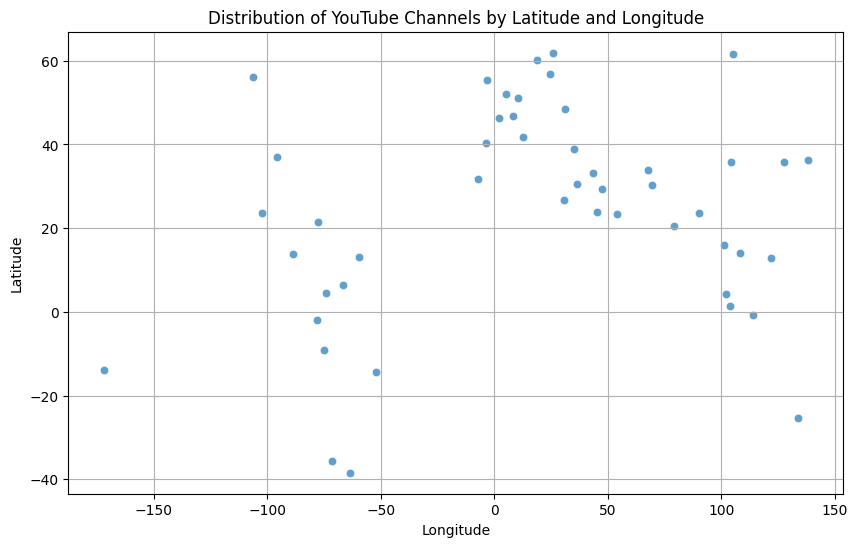

In [85]:
distribution_youtube_channels=df.groupby(['Latitude','Longitude'])['Youtuber'].count().sort_values(ascending=False).reset_index()
print(distribution_youtube_channels)
# Extract latitude and longitude data
latitude = distribution_youtube_channels['Latitude']
longitude = distribution_youtube_channels['Longitude']

# Plot the data on a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=longitude, y=latitude, alpha=0.7)
plt.title('Distribution of YouTube Channels by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# Q15.	What is the correlation between the number of subscribers and the population of a country?

             subscribers  Population
subscribers     1.000000    0.082549
Population      0.082549    1.000000


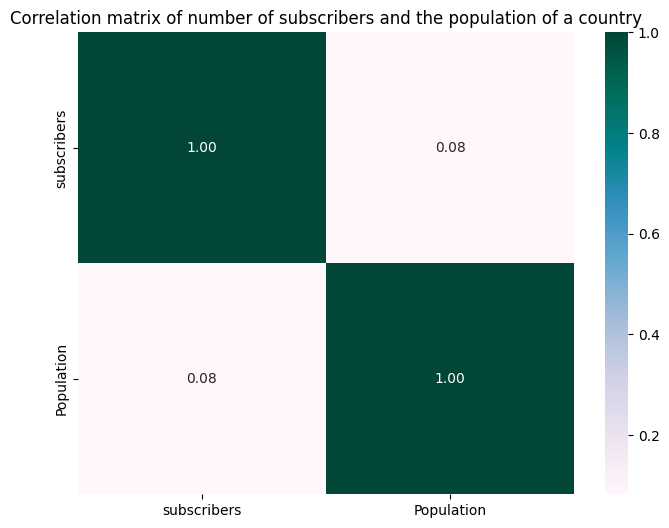

In [ ]:
numeric_df=df[['subscribers','Population']].select_dtypes(include=['float64'])
corr_matrix=numeric_df.corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation matrix of number of subscribers and the population of a country')
plt.show()

# Q16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

          Country  Youtuber
0   United States       315
1           India       169
2          Brazil        62
3  United Kingdom        44
4          Mexico        33
5       Indonesia        28
6           Spain        22
7        Thailand        18
8     South Korea        17
9          Russia        16


<ipython-input-7-cc75bc150367>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Youtuber_y',y='Population',data=df_merged,palette='viridis')


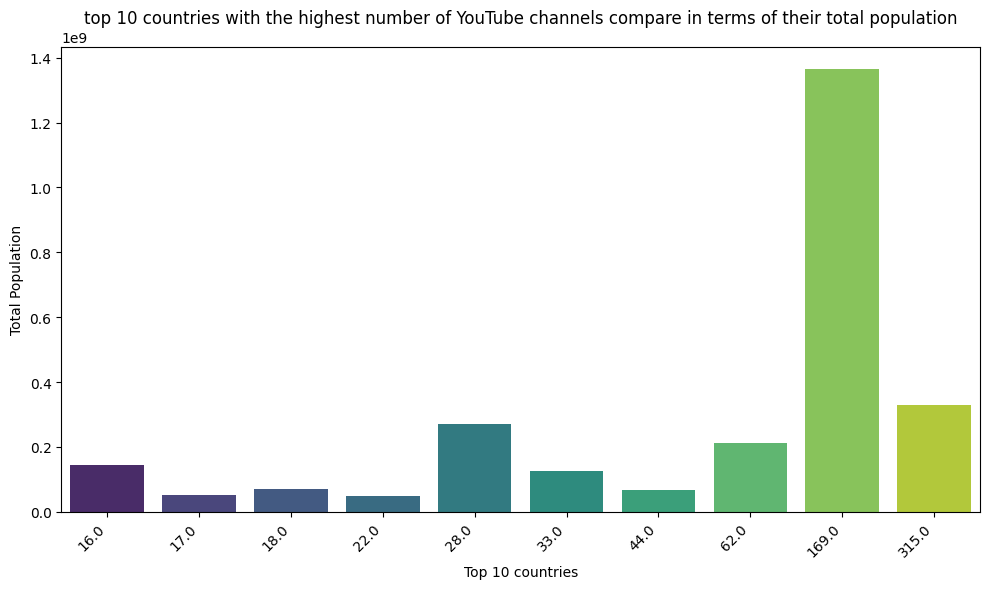

In [7]:
top_10_countries_with_youtube_channels=df.groupby('Country')['Youtuber'].count().sort_values(ascending=False).reset_index().head(10)
print(top_10_countries_with_youtube_channels)
# Merge the 'Youtuber' count back into the original dataframe
df_merged=df.merge(top_10_countries_with_youtube_channels,on='Country',how='left')
# Plot the total population for the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Youtuber_y',y='Population',data=df_merged,palette='viridis')
plt.title('top 10 countries with the highest number of YouTube channels compare in terms of their total population')
plt.xlabel('Top 10 countries')
plt.ylabel('Total Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

                              subscribers_for_last_30_days  Unemployment rate
subscribers_for_last_30_days                      1.000000          -0.018434
Unemployment rate                                -0.018434           1.000000


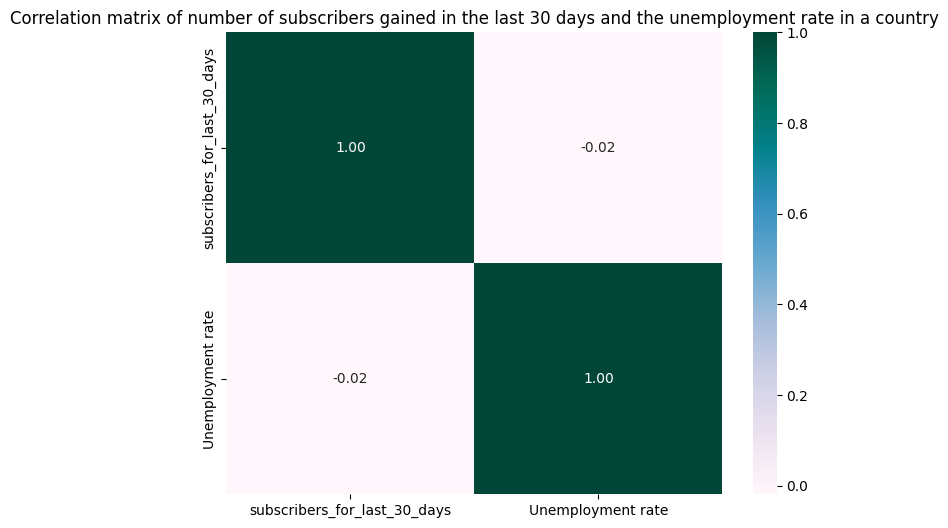

In [ ]:
numeric_df=df[['subscribers_for_last_30_days','Unemployment rate']].select_dtypes(include=['float64'])
corr_matrix=numeric_df.corr()
print(corr_matrix)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title('Correlation matrix of number of subscribers gained in the last 30 days and the unemployment rate in a country')
plt.show()

# Q18.	How does the distribution of video views for the last 30 days vary across different channel types?

     channel_type           sum
0   Entertainment  6.386184e+10
1           Music  3.773526e+10
2          People  1.720830e+10
3       Education  1.003686e+10
4          Comedy  9.618215e+09
5           Games  8.668806e+09
6            Film  5.763538e+09
7            News  5.250126e+09
8          Sports  2.843109e+09
9           Howto  2.170354e+09
10        Animals  2.122043e+09
11           Tech  9.365210e+08
12          Autos  7.065205e+08
13      Nonprofit  1.951810e+08


<ipython-input-14-36c3a1d6d3c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel_type',y='sum',data=distribution_of_video_views,palette='viridis')


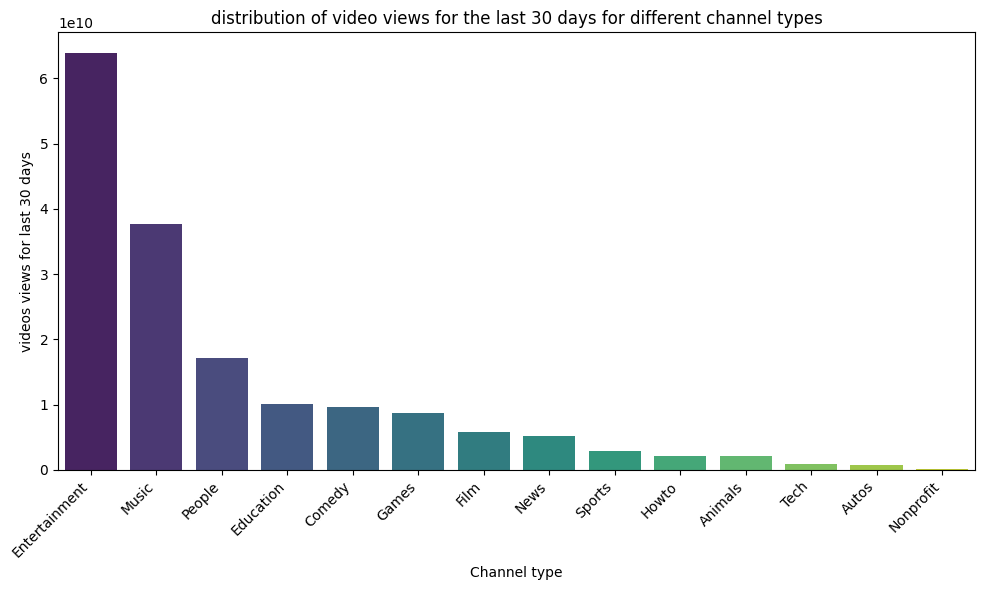

In [14]:
distribution_of_video_views=df.groupby('channel_type')['video_views_for_the_last_30_days'].sum().sort_values(ascending=False).reset_index(name='sum')
print(distribution_of_video_views)
plt.figure(figsize=(10, 6))
sns.barplot(x='channel_type',y='sum',data=distribution_of_video_views,palette='viridis')
plt.title('distribution of video views for the last 30 days for different channel types')
plt.xlabel('Channel type')
plt.ylabel('videos views for last 30 days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Q19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?

   created_month  uploads
0            Aug  1320718
1            Oct  1301703
2            Sep  1181665
3            Jun   979456
4            Jan   809272
5            Nov   804584
6            Feb   786083
7            May   728341
8            Jul   498739
9            Mar   373174
10           Dec   253978
11           Apr   177495


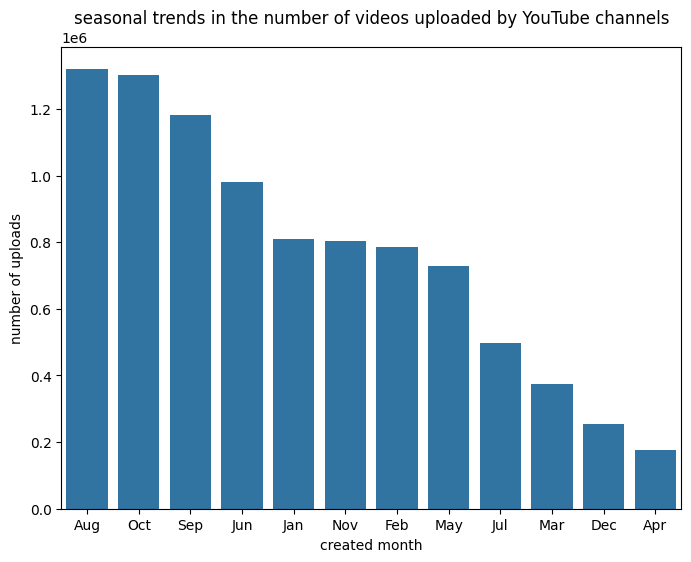

In [ ]:
seasonal_trend=df.groupby('created_month')['uploads'].sum().sort_values(ascending=False).reset_index()
print(seasonal_trend)
plt.figure(figsize=(8,6))
sns.barplot(x='created_month',y='uploads',data=seasonal_trend)
plt.title('seasonal trends in the number of videos uploaded by YouTube channels')
plt.xlabel('created month')
plt.ylabel('number of uploads')
plt.show()

# Q20.	What is the average number of subscribers gained per month since the creation of YouTube channels?

   created_month   subscribers
0            Sep  2.587938e+07
1            Jun  2.551867e+07
2            Mar  2.500581e+07
3            May  2.463176e+07
4            Dec  2.375493e+07
5            Feb  2.289254e+07
6            Jan  2.226040e+07
7            Aug  2.224819e+07
8            Apr  2.199437e+07
9            Nov  2.192302e+07
10           Jul  2.131905e+07
11           Oct  1.937814e+07


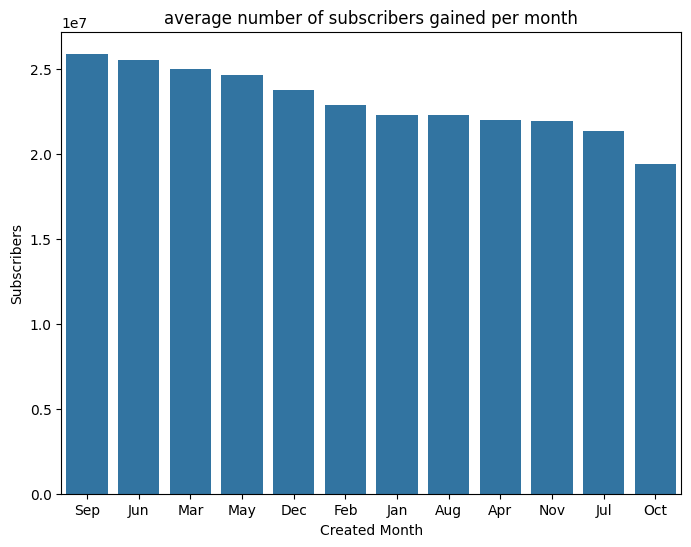

In [ ]:
avg_subscribers_per_month=df.groupby('created_month')['subscribers'].mean().sort_values(ascending=False).reset_index()
print(avg_subscribers_per_month)
plt.figure(figsize=(8,6))
# Pass the DataFrame to the 'data' parameter, and specify 'created_month' and 'subscribers' as x and y columns
sns.barplot(x='created_month',y='subscribers',data=avg_subscribers_per_month)
plt.title('average number of subscribers gained per month')
plt.xlabel('Created Month')
plt.ylabel('Subscribers')
plt.show()